In [1]:
import os
import re
import glob
import random
import numpy as np
import scipy
import scipy.io as sio
import scipy.ndimage as ndimage
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import braingeneers
import braingeneers.data.datasets_electrophysiology as ephys
from braingeneers.analysis.analysis import SpikeData, read_phy_files, randomize_raster
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [2]:
sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')

/tmp/ipykernel_928489/473825948.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


In [3]:
def plot_raster(sd, ax):
    idces, times = sd.idces_times()
    ax.scatter(times/1000, idces, marker='|', s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax.set_title("Raster Plot")
    
def raster_analysis_bounds(sd, xsize=10, ysize=6, start_time=0, stop_time=None, save_path=None):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)  # in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float), sigma=sigma)
    t = np.linspace(0, sd.length, pop_rate.shape[0]) / 1000

    # Determine the stop_time if it's not provided
    if stop_time is None:
        stop_time = t[-1]

    # Filter times and idces within the specified start and stop times
    mask = (times >= start_time * 1000) & (times <= stop_time * 1000)
    times = times[mask]
    idces = idces[mask]

    fig, ax = plt.subplots(figsize=(xsize, ysize))

    ax.scatter(times / 1000, idces, marker='|', s=1)
    ax2 = ax.twinx()
    ax2.plot(t, pop_rate_smooth, c='r')

    ax.set_xlim(start_time, stop_time)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

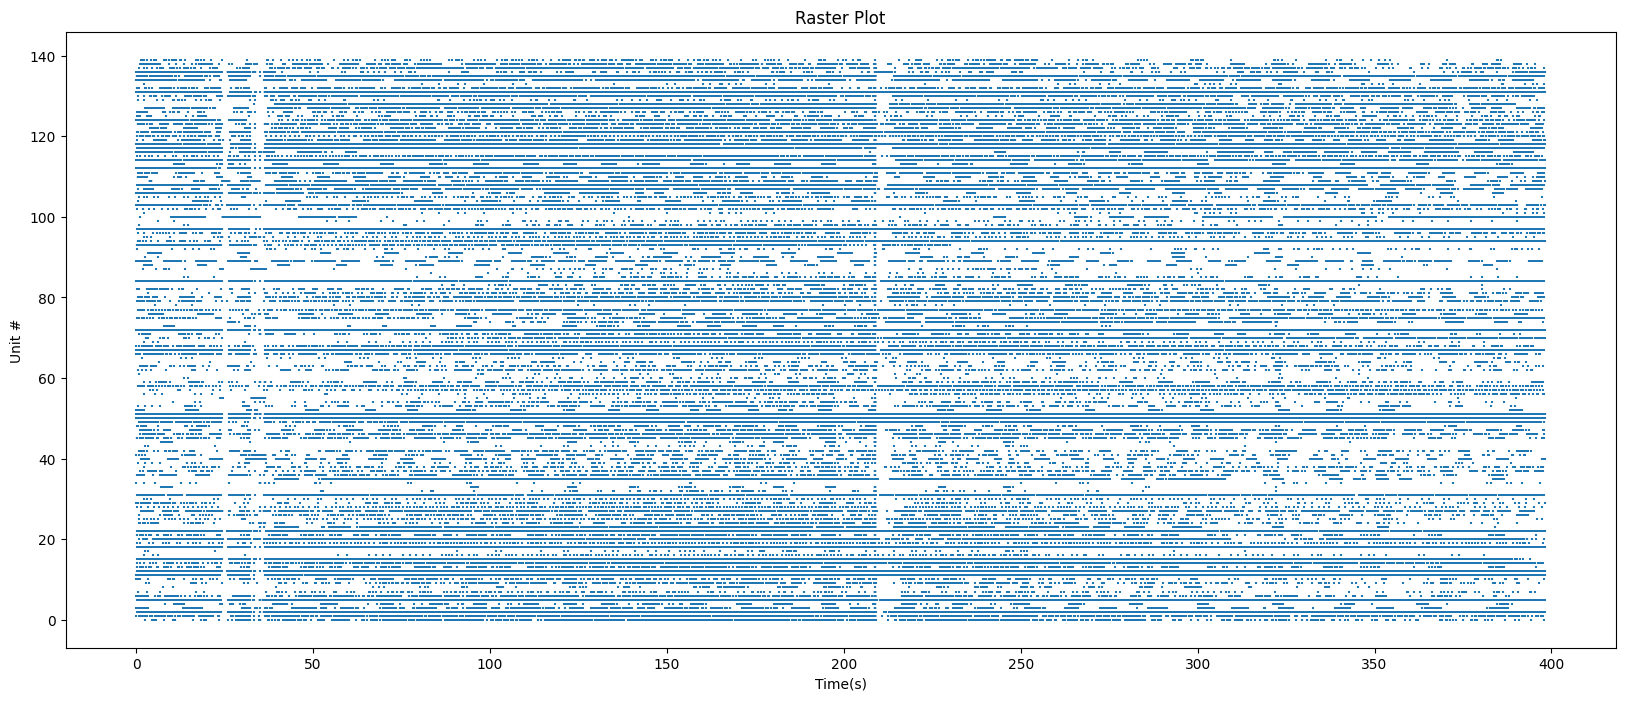

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))

# Call the plot_sttc function
plot_raster(sd, ax)

# Show the plot
plt.show()

In [ ]:
raster_analysis_bounds(sd, xsize=25, ysize=5, start_time=20, stop_time=40)

In [ ]:
raster_analysis_bounds(sd, xsize=25, ysize=5, start_time=200, stop_time=220)

Remove from 22.5 to 27.5
Remove 32 to 37.5

In [ ]:
sd.length

In [4]:
sd_1 = sd.subtime(0, 22.5*1000)

In [5]:
sd_2 = sd.subtime(27.5*1000, 32*1000)

In [6]:
sd_3 = sd.subtime(37.5*1000, 207.5*1000)

In [7]:
sd_4 = sd.subtime(210*1000, sd.length)

In [8]:
sd_1.length

22500.0

In [9]:
spike_train_1 = sd_1.train
spike_train_2 = sd_2.train
spike_train_3 = sd_3.train
spike_train_4 = sd_4.train

In [10]:
# Assuming you have a list of numpy arrays representing spike trains


# Value to add
x = 22.5*1000

# Adding value "x" to every spike time in each neuron's spike train
modified_spike_train_2 = [neuron_spike_times + x for neuron_spike_times in spike_train_2]

In [11]:
x = 27*1000

# Adding value "x" to every spike time in each neuron's spike train
modified_spike_train_3 = [neuron_spike_times + x for neuron_spike_times in spike_train_3]

In [12]:
x = 197*1000

# Adding value "x" to every spike time in each neuron's spike train
modified_spike_train_4 = [neuron_spike_times + x for neuron_spike_times in spike_train_4]

In [ ]:
# def combine_multiple_spike_trains(spike_train_list):
#     num_neurons = len(spike_train_list[0])
#     num_spike_trains = len(spike_train_list)
#     combined_spike_train = [np.array([]) for _ in range(num_neurons)]
    
#     for neuron in range(num_neurons):
#         combined_neuron = np.concatenate([spike_train_list[i][neuron] for i in range(num_spike_trains)])
#         combined_spike_train[neuron] = combined_neuron
    
#     return combined_spike_train

# # Call the function to combine spike trains
# combined_spike_train = combine_multiple_spike_trains([spike_train_1, spike_train_2])
# print("Combined Spike Train:", len(combined_spike_train[0]))


In [13]:
def combine_multiple_spike_trains(spike_train_list):
    num_neurons = len(spike_train_list[0])
    num_spike_trains = len(spike_train_list)
    combined_spike_train = [np.array([]) for _ in range(num_neurons)]
    
    for neuron in range(num_neurons):
        combined_neuron = np.array([])  # Initialize an empty array for each neuron
        for i in range(num_spike_trains):
            combined_neuron = np.append(combined_neuron, spike_train_list[i][neuron])
        combined_spike_train[neuron] = combined_neuron
    
    return combined_spike_train

# Call the function to combine spike trains
combined_spike_train = combine_multiple_spike_trains([spike_train_1, modified_spike_train_2, modified_spike_train_3, modified_spike_train_4])
print("Combined Spike Train:", len(combined_spike_train[0]))

Combined Spike Train: 978


In [14]:
print(len(sd.train[0]))

1014


In [ ]:
len(combined_spike_train)

In [ ]:
# def spike_time_tiling_2(train, i, j, delt=20):
#         '''
#         Given the indices of two units of interest, compute the spike
#         time tiling coefficient [1], a metric for causal relationships
#         between spike trains with some improved intuitive properties
#         compared to the Pearson correlation coefficient.
#         [1] Cutts & Eglen. Detecting pairwise correlations in spike
#             trains: An objective comparison of methods and application
#             to the study of retinal waves. J Neurosci 34:43,
#             14288–14303 (2014).
#         '''
#         tA, tB = train[i], train[j]

#         if len(tA) == 0 or len(tB) == 0:
#             return 0.0

#         TA = _sttc_ta(tA, delt, self.length) / self.length
#         TB = _sttc_ta(tB, delt, self.length) / self.length

#         PA = _sttc_na(tA, tB, delt) / len(tA)
#         PB = _sttc_na(tB, tA, delt) / len(tB)

#         aa = (PA - TB) / (1 - PA * TB) if PA * TB != 1 else 0
#         bb = (PB - TA) / (1 - PB * TA) if PB * TA != 1 else 0
#         return (aa + bb) / 2

In [ ]:
# upd_sd = SpikeData(combined_spike_train, length=(sd_1.length + sd_2.length + sd_3.length + sd_4.length), N=sd_1.N, 
#                          metadata=sd_1.metadata, neuron_data=sd_1.neuron_data,
#                          neuron_attributes=sd_1.neuron_attributes)

In [14]:
upd_sd2 = SpikeData(combined_spike_train)

In [ ]:
upd_sd2.length

In [ ]:
sd.length

In [ ]:
(sd.length - upd_sd2.length) / 1000

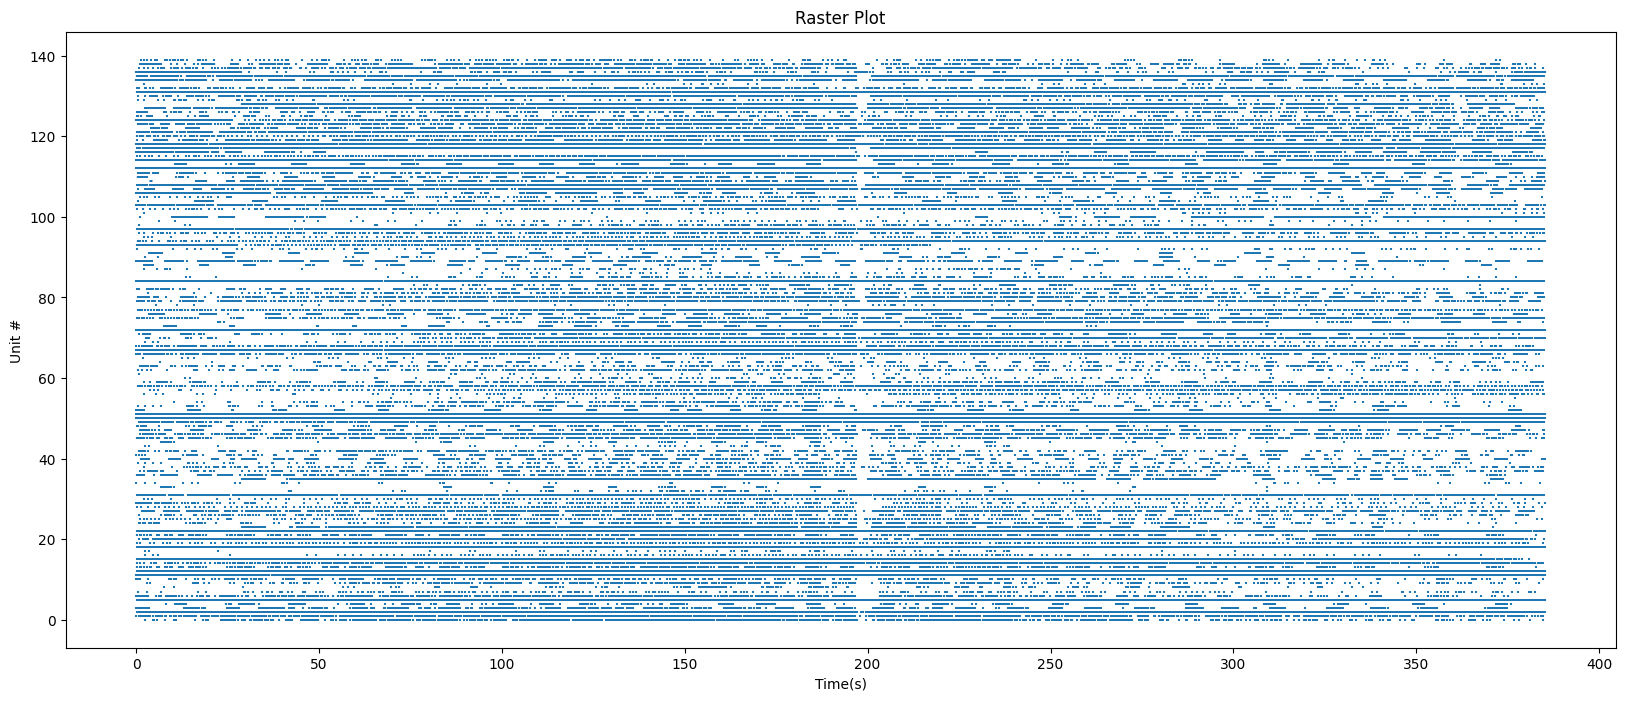

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))

# Call the plot_sttc function
plot_raster(upd_sd2, ax)

# Show the plot
plt.show()

In [16]:
import pickle

In [17]:
file_path = '/home/jovyan/work/Human_Hippocampus/StitchedData.pkl'

In [18]:
with open(file_path, 'wb') as file:
    pickle.dump(upd_sd2, file)

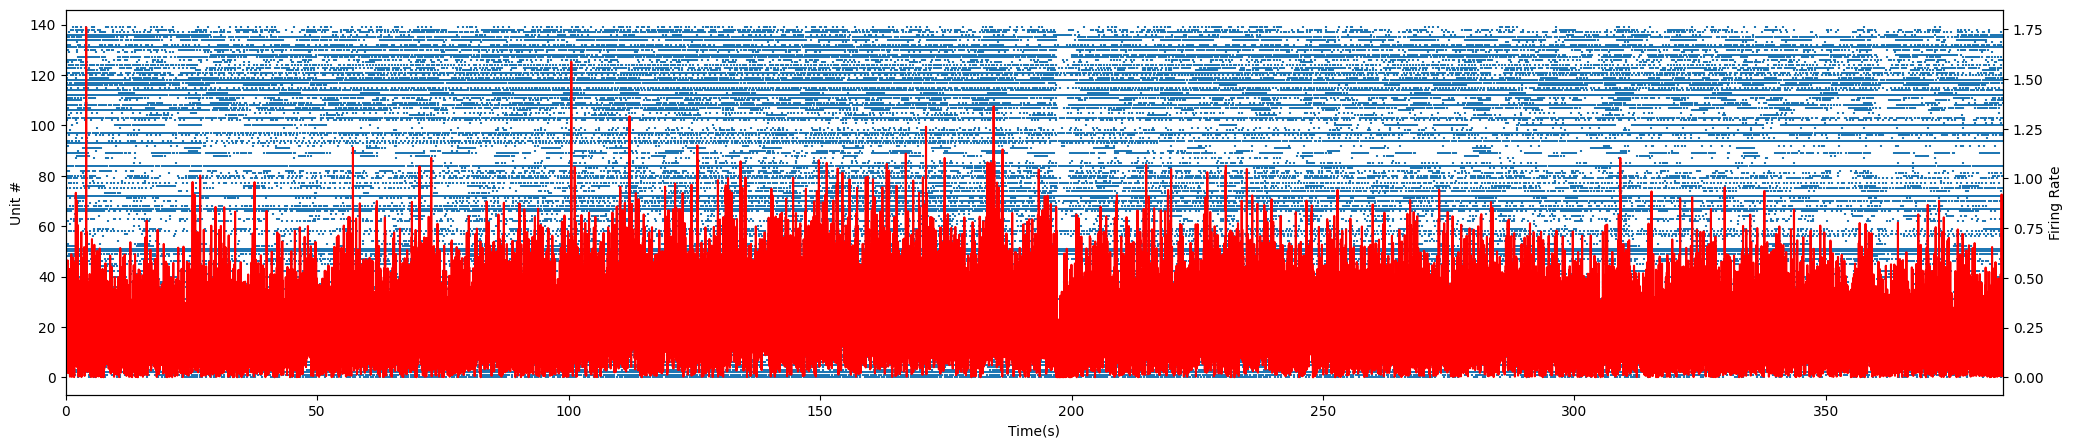

In [22]:
raster_analysis_bounds(upd_sd2, xsize=25, ysize=5, start_time=0, stop_time=upd_sd2.length/1000)

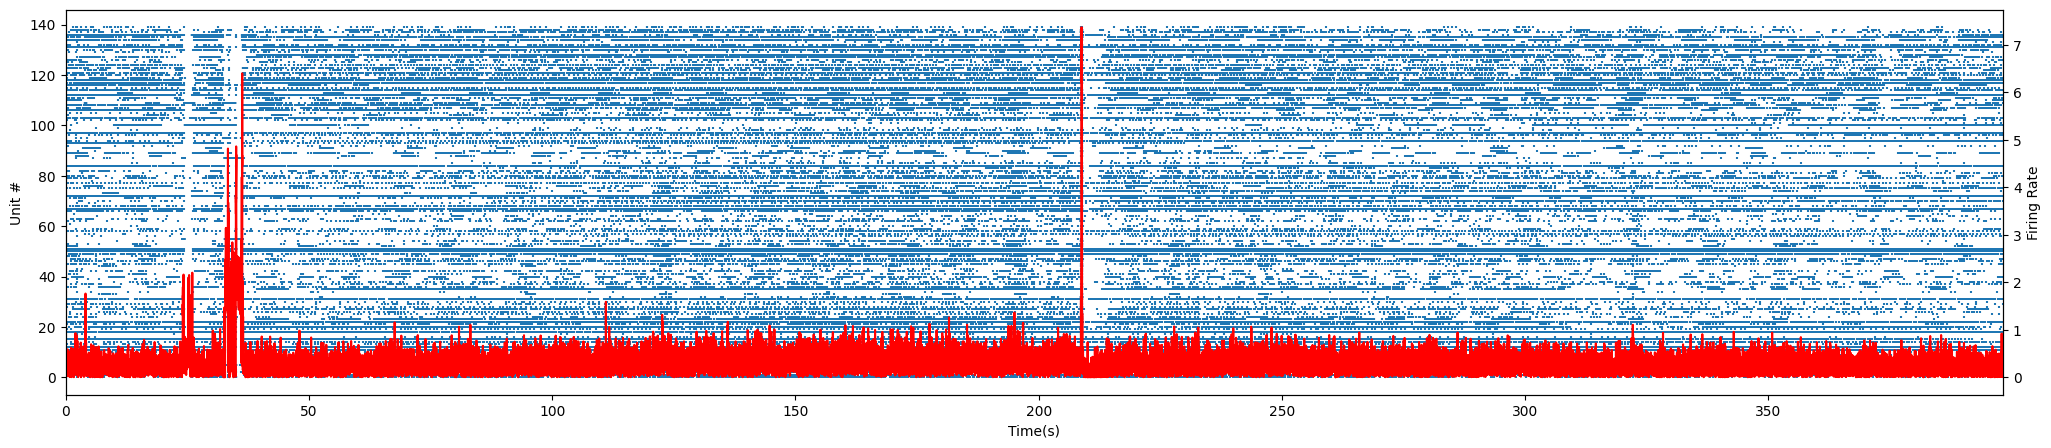

In [23]:
raster_analysis_bounds(sd, xsize=25, ysize=5, start_time=0, stop_time=sd.length/1000)

In [19]:
import pickle
file = open('/home/jovyan/work/Human_Hippocampus/StitchedData.pkl', 'rb')
stitched_data = pickle.load(file)
file.close()

In [21]:
stitched_data.N

140

In [ ]:
sd_total = sd_1

In [ ]:
sd_total.append(sd_2)

In [ ]:
sd_total.N

In [ ]:
sd_total.append(sd_3)

In [ ]:
sd_total.append(sd_4)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Call the plot_sttc function
plot_raster(sd_total, ax)

# Show the plot
plt.show()

In [ ]:
sd_1